# loading libraries<a href="#loading-libraries" class="anchor-link">¶</a>

In \[91\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn import neighbors
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV 
    from sklearn.svm import SVC
    import warnings
    warnings.filterwarnings("ignore")

# loading data file<a href="#loading-data-file" class="anchor-link">¶</a>

In \[39\]:

    BloodDonation = pd.read_csv('transfusion.csv')
    BloodDonation.head()

Out\[39\]:

|     | Recency (months) | Frequency (times) | Monetary (c.c. blood) | Time (months) | Donation in March 2007 |
|-----|------------------|-------------------|-----------------------|---------------|------------------------|
| 0   | 2                | 50                | 12500                 | 98            | 1                      |
| 1   | 0                | 13                | 3250                  | 28            | 1                      |
| 2   | 1                | 16                | 4000                  | 35            | 1                      |
| 3   | 2                | 20                | 5000                  | 45            | 1                      |
| 4   | 1                | 24                | 6000                  | 77            | 0                      |

In \[41\]:

    sns.pairplot(BloodDonation, hue = 'Donation in March 2007')

Out\[41\]:

    <seaborn.axisgrid.PairGrid at 0x249398bf790>

![](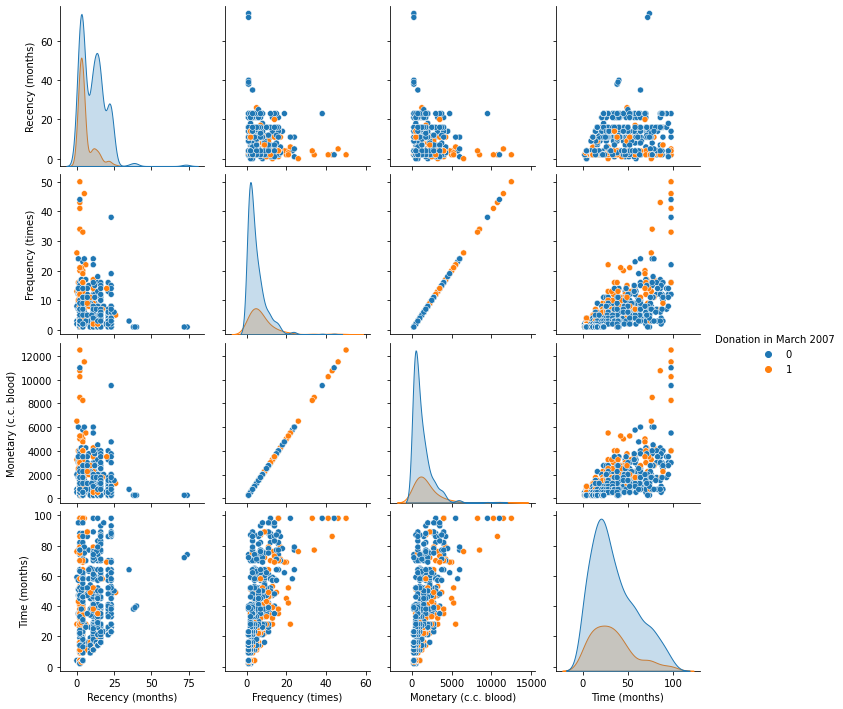%0A)

# knn iteration 1<a href="#knn-iteration-1" class="anchor-link">¶</a>

In \[66\]:

    x = BloodDonation.iloc[:,0:4] #feature matrix
    y = BloodDonation.iloc[:, 4] #response vector (target)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3315508,random_state=None) #train/test split

In \[67\]:

    x_train

Out\[67\]:

|     | Recency (months) | Frequency (times) | Monetary (c.c. blood) | Time (months) |
|-----|------------------|-------------------|-----------------------|---------------|
| 367 | 14               | 4                 | 1000                  | 38            |
| 497 | 38               | 1                 | 250                   | 38            |
| 482 | 23               | 1                 | 250                   | 23            |
| 402 | 23               | 8                 | 2000                  | 46            |
| 118 | 1                | 7                 | 1750                  | 57            |
| ... | ...              | ...               | ...                   | ...           |
| 693 | 14               | 1                 | 250                   | 14            |
| 191 | 4                | 7                 | 1750                  | 52            |
| 582 | 2                | 1                 | 250                   | 2             |
| 14  | 2                | 6                 | 1500                  | 15            |
| 366 | 23               | 15                | 3750                  | 57            |

500 rows × 4 columns

In \[68\]:

    y_train

Out\[68\]:

    367    0
    497    0
    482    0
    402    0
    118    0
          ..
    693    0
    191    0
    582    0
    14     1
    366    0
    Name: Donation in March 2007, Length: 500, dtype: int64

In \[69\]:

    x_test

Out\[69\]:

|     | Recency (months) | Frequency (times) | Monetary (c.c. blood) | Time (months) |
|-----|------------------|-------------------|-----------------------|---------------|
| 240 | 8                | 8                 | 2000                  | 52            |
| 464 | 21               | 1                 | 250                   | 21            |
| 429 | 16               | 3                 | 750                   | 40            |
| 44  | 4                | 20                | 5000                  | 69            |
| 259 | 12               | 12                | 3000                  | 58            |
| ... | ...              | ...               | ...                   | ...           |
| 682 | 11               | 2                 | 500                   | 25            |
| 499 | 74               | 1                 | 250                   | 74            |
| 168 | 2                | 1                 | 250                   | 2             |
| 562 | 4                | 16                | 4000                  | 98            |
| 528 | 5                | 24                | 6000                  | 79            |

248 rows × 4 columns

In \[70\]:

    y_test

Out\[70\]:

    240    1
    464    0
    429    0
    44     1
    259    0
          ..
    682    0
    499    0
    168    0
    562    1
    528    0
    Name: Donation in March 2007, Length: 248, dtype: int64

In \[71\]:

    #Converting the Train and Test Data to Scalars 
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    x_test = sc_x.transform(x_test)
    x_train

Out\[71\]:

    array([[ 0.60991948, -0.26721398, -0.26721398,  0.14837672],
           [ 3.69551552, -0.77716431, -0.77716431,  0.14837672],
           [ 1.76701799, -0.77716431, -0.77716431, -0.46306581],
           ...,
           [-0.93287853, -0.77716431, -0.77716431, -1.31908535],
           [-0.93287853,  0.07275291,  0.07275291, -0.78916849],
           [ 1.76701799,  1.60260393,  1.60260393,  0.92287059]])

In \[72\]:

    #Initialising the Classifier
    classifier= neighbors.KNeighborsClassifier(n_neighbors=23,p=2) # estimator instantiation
    classifier.fit(x_train,y_train) #model fit
    print(classifier)

    KNeighborsClassifier(n_neighbors=23)

In \[73\]:

    y_pred = classifier.predict(x_test) #new predictions made

    first_pred = metrics.accuracy_score(y_test, y_pred)*100 #accuracy of classification
    print("Accuracy:",first_pred)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    Accuracy: 81.04838709677419
    [[185   7]
     [ 40  16]]
                  precision    recall  f1-score   support

               0       0.82      0.96      0.89       192
               1       0.70      0.29      0.41        56

        accuracy                           0.81       248
       macro avg       0.76      0.62      0.65       248
    weighted avg       0.79      0.81      0.78       248

In \[74\]:

    y_pred

Out\[74\]:

    array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0], dtype=int64)

# knn iteration 2<a href="#knn-iteration-2" class="anchor-link">¶</a>

In \[75\]:

    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3315508,random_state=None)
    x_train1 = sc_x.fit_transform(x_train1)
    x_test1 = sc_x.transform(x_test1)
    classifier= neighbors.KNeighborsClassifier(n_neighbors=17,p=2)
    classifier.fit(x_train1,y_train1)
    y_pred1 = classifier.predict(x_test1)
    second_pred = metrics.accuracy_score(y_test1, y_pred1)*100 
    print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1)*100)
    print(confusion_matrix(y_test1,y_pred1))
    print(classification_report(y_test1,y_pred1))

    Accuracy: 76.20967741935483
    [[177  12]
     [ 47  12]]
                  precision    recall  f1-score   support

               0       0.79      0.94      0.86       189
               1       0.50      0.20      0.29        59

        accuracy                           0.76       248
       macro avg       0.65      0.57      0.57       248
    weighted avg       0.72      0.76      0.72       248

# knn iteration 3<a href="#knn-iteration-3" class="anchor-link">¶</a>

In \[76\]:

    x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.3315508,random_state=None)
    x_train2 = sc_x.fit_transform(x_train2)
    x_test2 = sc_x.transform(x_test2)
    classifier= neighbors.KNeighborsClassifier(n_neighbors=17,p=2)
    classifier.fit(x_train2,y_train2)
    y_pred2 = classifier.predict(x_test2)
    third_pred = metrics.accuracy_score(y_test2, y_pred2)*100 
    print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2)*100)
    print(confusion_matrix(y_test2,y_pred2))
    print(classification_report(y_test2,y_pred2))

    Accuracy: 80.24193548387096
    [[169  16]
     [ 33  30]]
                  precision    recall  f1-score   support

               0       0.84      0.91      0.87       185
               1       0.65      0.48      0.55        63

        accuracy                           0.80       248
       macro avg       0.74      0.69      0.71       248
    weighted avg       0.79      0.80      0.79       248

In \[77\]:

    #testing accuracy for k= 1 to k=25
    krange=range(1,26)
    score=[]

    for k in krange:
        mdl=KNeighborsClassifier(n_neighbors=k,p=2)
        mdl.fit(x_train2,y_train2)
        yp=mdl.predict(x_test2)
        score.append(metrics.accuracy_score(y_test2, yp))

    #plotting accuracy of different k    
    plt.plot(krange,score)
    plt.xlabel('k-value')
    plt.ylabel('corresponding accuracy level')

Out\[77\]:

    Text(0, 0.5, 'corresponding accuracy level')

![](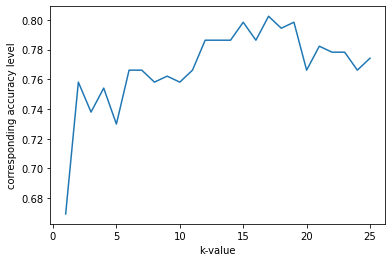%0A)

In \[98\]:

    #predicting on out-of-sample data
    k_n=KNeighborsClassifier(n_neighbors=4,p=2)
    k_n.fit(x_train2,y_train2)
    k_n.predict([np.array([2,50,12500,98])])

Out\[98\]:

    array([1], dtype=int64)

In \[79\]:

    print("First Random state prediction Accuracy", first_pred)
    print("Second Random state prediction Accuracy", second_pred)
    print("Third Random state prediction Accuracy", third_pred)
    import math
    Average_Accuracy =(first_pred + second_pred + third_pred)/3;
    print("Averacy Prediction Accuracy", Average_Accuracy)

    First Random state prediction Accuracy 81.04838709677419
    Second Random state prediction Accuracy 76.20967741935483
    Third Random state prediction Accuracy 80.24193548387096
    Averacy Prediction Accuracy 79.16666666666667

# svm iteration 1<a href="#svm-iteration-1" class="anchor-link">¶</a>

In \[92\]:

    from sklearn import svm 
    #Initializing classifier and setting kernal to linear. 
    clf = svm.SVC(kernel="linear")  
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    first_pred = metrics.accuracy_score(y_test, y_pred)*100 
    print("Accuracy:",first_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    Accuracy: 77.41935483870968
    [[192   0]
     [ 56   0]]
                  precision    recall  f1-score   support

               0       0.77      1.00      0.87       192
               1       0.00      0.00      0.00        56

        accuracy                           0.77       248
       macro avg       0.39      0.50      0.44       248
    weighted avg       0.60      0.77      0.68       248

# svm iteration 2<a href="#svm-iteration-2" class="anchor-link">¶</a>

In \[93\]:

     
    clf = svm.SVC(kernel="linear")  
    clf.fit(x_train1, y_train1)
     
    y_pred = clf.predict(x_test1)


    second_pred = metrics.accuracy_score(y_test1, y_pred)*100 
    print("Accuracy:",second_pred)
    print(confusion_matrix(y_test1, y_pred))
    print(classification_report(y_test1, y_pred))

    Accuracy: 76.20967741935483
    [[188   1]
     [ 58   1]]
                  precision    recall  f1-score   support

               0       0.76      0.99      0.86       189
               1       0.50      0.02      0.03        59

        accuracy                           0.76       248
       macro avg       0.63      0.51      0.45       248
    weighted avg       0.70      0.76      0.67       248

# svm iternation 3<a href="#svm-iternation-3" class="anchor-link">¶</a>

In \[94\]:

    clf = svm.SVC(kernel="linear")  
    clf.fit(x_train2, y_train2)
     
    y_pred = clf.predict(x_test2)


    third_pred = metrics.accuracy_score(y_test2, y_pred)*100 
    print("Accuracy:",third_pred)
    print(confusion_matrix(y_test2, y_pred))
    print(classification_report(y_test2, y_pred))

    Accuracy: 74.59677419354838
    [[185   0]
     [ 63   0]]
                  precision    recall  f1-score   support

               0       0.75      1.00      0.85       185
               1       0.00      0.00      0.00        63

        accuracy                           0.75       248
       macro avg       0.37      0.50      0.43       248
    weighted avg       0.56      0.75      0.64       248

In \[95\]:

    print("First Random state prediction Accuracy", first_pred)
    print("Second Random state prediction Accuracy", second_pred)
    print("Third Random state prediction Accuracy", third_pred)
    import math
    Average_Accuracy =(first_pred + second_pred + third_pred)/3;
    print("Averacy Prediction Accuracy", Average_Accuracy)

    First Random state prediction Accuracy 77.41935483870968
    Second Random state prediction Accuracy 76.20967741935483
    Third Random state prediction Accuracy 74.59677419354838
    Averacy Prediction Accuracy 76.0752688172043

In \[96\]:

    #predicting on out-of-sample data
    sv=svm.SVC(kernel="linear") 
    sv.fit(x_train2,y_train2)
    sv.predict([np.array([2,50,12500,98])])

Out\[96\]:

    array([1], dtype=int64)

# Decision Tree iteration 1<a href="#Decision-Tree-iteration-1" class="anchor-link">¶</a>

In \[99\]:

    from sklearn.tree import DecisionTreeClassifier
    #Initializing Classifier and setting the maximum depth to 3
    clf1 = DecisionTreeClassifier(max_depth=3)
     
    clf1 = clf1.fit(x_train,y_train) 
    y_pred1 = clf1.predict(x_test)

    first_pred = metrics.accuracy_score(y_test, y_pred1)*100 
    print("Accuracy:",first_pred)
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))

    Accuracy: 79.83870967741935
    [[180  12]
     [ 38  18]]
                  precision    recall  f1-score   support

               0       0.83      0.94      0.88       192
               1       0.60      0.32      0.42        56

        accuracy                           0.80       248
       macro avg       0.71      0.63      0.65       248
    weighted avg       0.77      0.80      0.77       248

# Decision Tree iteration 2<a href="#Decision-Tree-iteration-2" class="anchor-link">¶</a>

In \[100\]:

    from sklearn.tree import DecisionTreeClassifier
    clf1 = DecisionTreeClassifier(max_depth=3)
     
    clf1 = clf1.fit(x_train1,y_train1) 
    y_pred1 = clf1.predict(x_test1)

    second_pred = metrics.accuracy_score(y_test1, y_pred1)*100 
    print("Accuracy:",second_pred)
    print(confusion_matrix(y_test1, y_pred1))
    print(classification_report(y_test1, y_pred1))

    Accuracy: 76.20967741935483
    [[171  18]
     [ 41  18]]
                  precision    recall  f1-score   support

               0       0.81      0.90      0.85       189
               1       0.50      0.31      0.38        59

        accuracy                           0.76       248
       macro avg       0.65      0.60      0.62       248
    weighted avg       0.73      0.76      0.74       248

# Decision Tree iteration 3<a href="#Decision-Tree-iteration-3" class="anchor-link">¶</a>

In \[88\]:

    from sklearn.tree import DecisionTreeClassifier
    clf1 = DecisionTreeClassifier(max_depth=3)
     
    clf1 = clf1.fit(x_train2,y_train2) 
    y_pred1 = clf1.predict(x_test2)

    third_pred = metrics.accuracy_score(y_test2, y_pred1)*100 
    print("Accuracy:",third_pred)
    print(confusion_matrix(y_test2, y_pred1))
    print(classification_report(y_test2, y_pred1))

    Accuracy: 77.41935483870968
    [[165  20]
     [ 36  27]]
                  precision    recall  f1-score   support

               0       0.82      0.89      0.85       185
               1       0.57      0.43      0.49        63

        accuracy                           0.77       248
       macro avg       0.70      0.66      0.67       248
    weighted avg       0.76      0.77      0.76       248

In \[89\]:

    print("First Random state prediction Accuracy", first_pred)
    print("Second Random state prediction Accuracy", second_pred)
    print("Third Random state prediction Accuracy", third_pred)
    import math
    Average_Accuracy =(first_pred + second_pred + third_pred)/3;
    print("Averacy Prediction Accuracy", Average_Accuracy)

    First Random state prediction Accuracy 79.83870967741935
    Second Random state prediction Accuracy 76.20967741935483
    Third Random state prediction Accuracy 77.41935483870968
    Averacy Prediction Accuracy 77.82258064516128

In \[104\]:

    #predicting on out-of-sample data
    dcl = DecisionTreeClassifier(max_depth=3)
    dcl.fit(x_train2,y_train2)
    dcl.predict([np.array([2,50,12500,98])])

Out\[104\]:

    array([0], dtype=int64)